## Introduction to Web Scraping and REST APIs

Here in this notebook I will do web Scraping for the extraction and parsing data from the websites in an automated fashion using the python. Its a useful technique for creating datasets for research and learning. While web scraping often involves prasing and processing HTML documents, some platforms also offer REST APIs to retrive information in a machine readable format like JSON. Here we will use web scraping and REST APIs to create a real world dataset.
We will follow these steps
* Downloading web pages using the requests library
* Inspecting the HTML source code of a web page
* Parsing parts of a website using Beautiful Soup
* Writing parsed information into CSV files
* Using a REST API to retrieve data as JSON



QUESTION: 

Write a Python function that creates a CSV file (comma-separated values) containing details about the 25 top GitHub repositories for any given topic. You can view the top repositories for the topic machine-learning on this page: https://github.com/topics/machine-learning. The output CSV should contain these details: repository name, owner's username, no. of stars, repository URL.

In [1]:
# Install the Library 
!pip install requests --upgrade --quiet

In [2]:
# Import the Library 
import requests 

`requests.get` function is used to download a web page.

In [3]:
# topic_url = 'https://github.com/topics/machine-learning' It's Giving an 404 Error

In [4]:
response = requests.get('https://github.com/topics/machine-learning')
response

<Response [200]>

In [5]:
type(response)

requests.models.Response

The status_code function is used to check that whether the request to get the contents of pages is sucessful or not. If the status code value is between 200 to 299 is means the request is sucessful. 

In [6]:
response.status_code

200

The content of the Web Page can be get by using the `.text property` of the `response`.

In [7]:
page_contents = response.text

In [8]:
len(page_contents)

483760

The page contains alot of characters! Let view the first 500 characters of the web page.

In [9]:
page_contents[:500]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubus'

The above shown code is theh source code of the web page. It written in a HTML language. It defines the content and structure of the web page. 

Now let save the contents to a file with `.html` extension

In [10]:
with open ('machine-learning-topics.html', 'w', encoding="utf-8") as file:
    file.write(page_contents)

#### Now lets try one more topic to download the web page using the requests and save it as html file.

In [11]:
response_1 = requests.get(' https://github.com/topics/data-analysis')
response_1

<Response [200]>

In [12]:
type(response_1)

requests.models.Response

In [13]:
response_1.status_code

200

In [14]:
page_contents_1 = response_1.text

In [15]:
len(page_contents_1)

483243

In [16]:
page_contents_1[:800]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-38f1bf52eeeb.css" '

In [17]:
with open ('data-analysis.html','w', encoding = "utf-8") as file:
    file.write(page_contents_1)

## Inspecting the HTML source code of a web page

As We know that web pages are written in a language called HTML (Hyper Text Markup Language). HTML is a fairly simple laguage comprrised of tags (also called nodes or elements). An HTML tag has three parts:
* Name (html, head,body, div etc)
* Attributes (href, target, class, id, etc)
* Children (< div > Some Content < div >)

### Inside an HTML Document

Here is a sample HTML document that uses many commonly used tags:


<html>
  <head>
    <title>All About Python</title>
  </head>
  <body>
    <div style="width: 640px; margin: 40px auto">
      <h1 style="text-align:center;">Python - A Programming Language</h1>
      <img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" alt="python-logo" style="width:240px;margin:0 auto;display:block;">
      <div>
        <h2>About Python</h2>
        <p>
          Python is an <span style="font-style: italic">interpreted, high-level and general-purpose</span> programming language. Python's design philosophy emphasizes code readability with its notable use of significant indentation. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects. Visit the <a href="https://docs.python.org/3/">official documentation</a> to learn more.
        </p>
      </div>
      <div>
        <h2>Some Python Libraries</h2>
        <ul id="libraries">
          <li>Numpy</li>
          <li>Pandas</li>
          <li>PyTorch</li>
          <li>Scikit Learn</li>
        </ul>
      </div>
      <div>
        <h2>Recent Python Versions</h2>
        <table id="versions-table">
          <tr>
            <th class="bordered-table">Version</th>
            <th class="bordered-table">Released on</th>
          </tr>
          <tr>
            <td class="bordered-table">Python 3.8</td>
            <td class="bordered-table">October 2019</td>
          </tr>
          <tr>
            <td class="bordered-table">Python 3.7</td>
            <td class="bordered-table">June 2018</td>
          </tr>
        </table>
          <style>
              .bordered-table { 
                  border: 1px solid black; padding: 8px;
              }
          </style>
      </div>
    </div>
  </body>
</html>

#### Some Common Tags and Attributes 

Some of the commonly used HTML tags are:

* `html`
* `head`
* `title`
* `body`
* `div`
* `span`
* `h1` to `h6`
* `p`
* `img`
* `ul`,`ol` and `li`
* `table`, `tr`, `th` and `td`
* `style`

Each tag supports several attributes. Following are some common attributes used to modify the behavior of tags:

* `id`
* `style`
* `class`
* `href`
* `src`


#### Inspecting HTML in the Browser

we can view the the source code of any webpage right wihin our broswer by right clicking anywhere on a page and selecting the "Inspect" option. It opens the "Developer Tools" pane, where the source code can be seen as tree. 

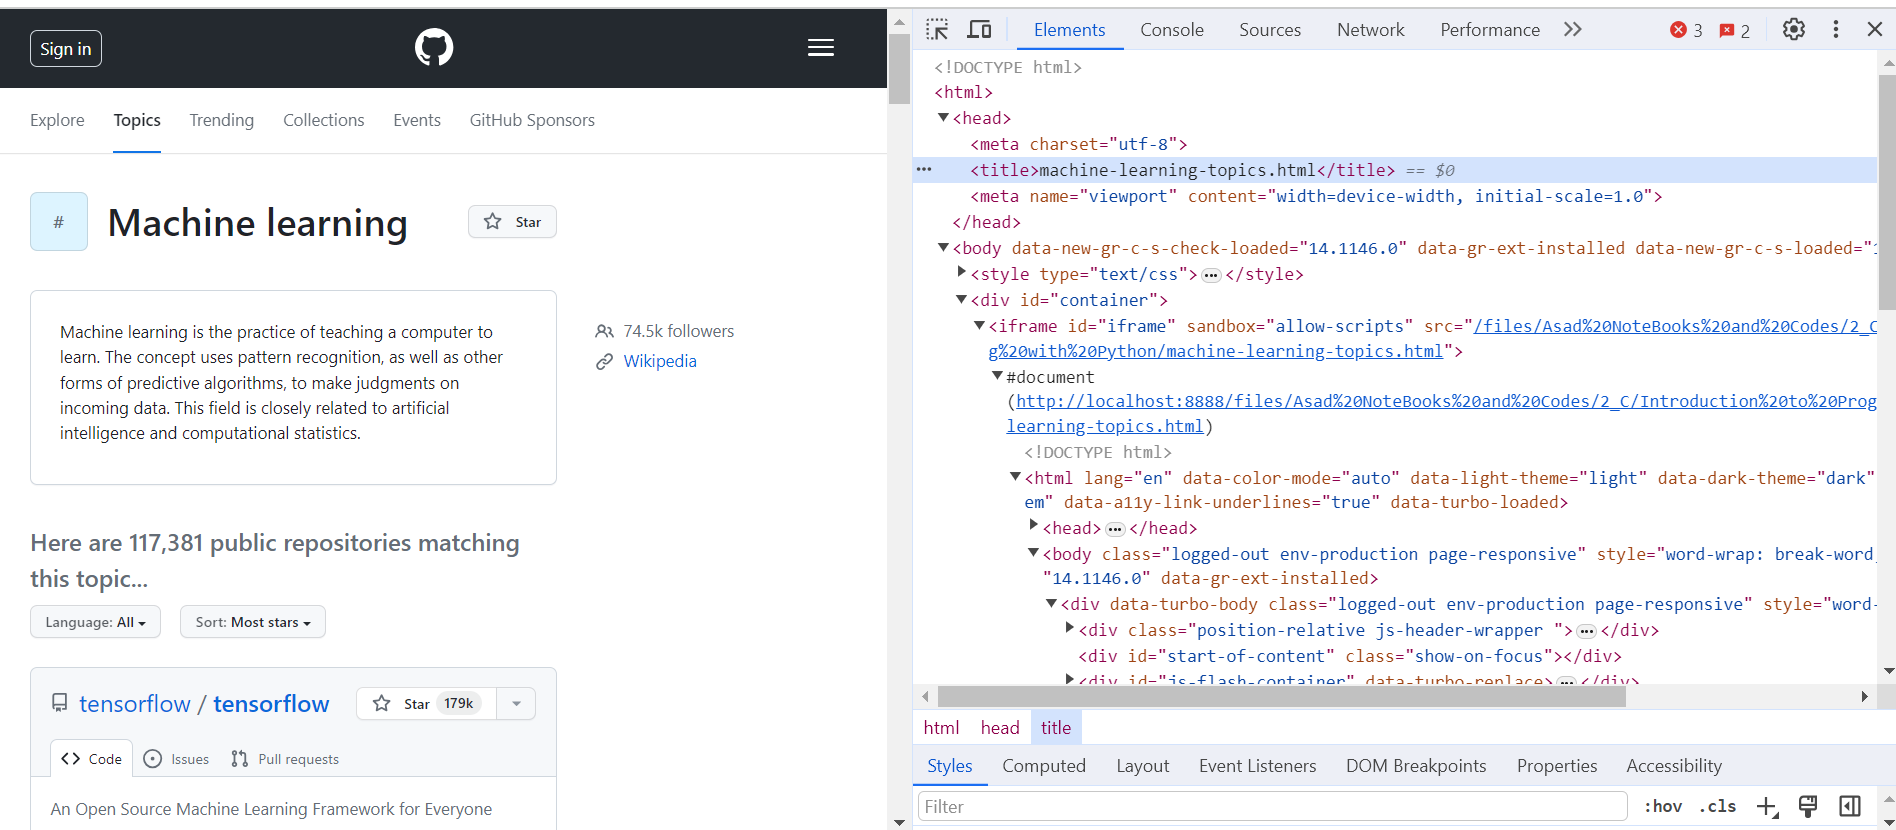

### Extracting information from HTML using Beautiful Soup 

To extract the information from the HTML source code of a webpage programmatically, the BeautifulSoup library is used. The `BeatifulSoup` class is import from `bs4` module.

In [18]:
! pip install beautifulsoup4 --upgrade --quiet

In [19]:
from bs4 import BeautifulSoup

Here we read the contents of the file `machine-learning.html` and create a `BeautifulSoup` object to parse the content. 

In [20]:
# with open('machine-learning-topics.html', 'r') as file:
#     html_source = file.read()    Giving an Error 

In [21]:
with open('machine-learning-topics.html', 'r', encoding = "utf-8") as file:
    html_source = file.read()

In [22]:
html_source [:1000]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-38f1bf52eeeb.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-56010aa53a8f.css" /><link data-color-theme="dark_dimmed" crossor

In [23]:
doc = BeautifulSoup(html_source, 'html.parser')

In [24]:
type(doc)

bs4.BeautifulSoup

#### Accessing a tag

what is the title of the page represented by `doc`

In [25]:
title_tag = doc.title
title_tag

<title>machine-learning · GitHub Topics · GitHub</title>

In [26]:
type(title_tag)

bs4.element.Tag

In [27]:
# The text within a tag can be accessed using `.text`
title_tag.text

'machine-learning · GitHub Topics · GitHub'

In [28]:
html_tag = doc.html
body_tag = doc.body
head_tag = doc.head

In [29]:
head_tag.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nmachine-learning · GitHub Topics · GitHub\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'

If a tag occurs more than once in a document e.g. <a> (which represents links), then doc.a finds the first <a> tag.

In [30]:
first_link = doc.a
first_link 

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [31]:
first_link.text

'Skip to content'

Find the first occurrence of each of these tags in doc: div, img, span, p, etc.

In [32]:
first = doc.img
first

<img alt="transformers" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e"/>

In [33]:
first.text

''

In [34]:
first.name

'img'

#### Finding all tags of the same type 
To find all the occurrences of a tag, use the find_all method.

QUESTION: Find all the link tags on the page. How many links does the page contain?

In [35]:
all_link_tags = doc.find_all('a')

In [36]:
len(all_link_tags)

442

In [37]:
all_link_tags[:3]

[<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>,
 <a aria-label="Homepage" class="mr-lg-3 color-fg-inherit flex-order-2" data-ga-click="(Logged out) Header, go to homepage, icon:logo-wordmark" href="https://github.com/">
 <svg aria-hidden="true" class="octicon octicon-mark-github" data-view-component="true" height="32" version="1.1" viewbox="0 0 16 16" width="32">
 <path d="M8 0c4.42 0 8 3.58 8 8a8.013 8.013 0 0 1-5.45 7.59c-.4.08-.55-.17-.55-.38 0-.27.01-1.13.01-2.2 0-.75-.25-1.23-.54-1.48 1.78-.2 3.65-.88 3.65-3.95 0-.88-.31-1.59-.82-2.15.08-.2.36-1.02-.08-2.12 0 0-.67-.22-2.2.82-.64-.18-1.32-.27-2-.27-.68 0-1.36.09-2 .27-1.53-1.03-2.2-.82-2.2-.82-.44 1.1-.16 1.92-.08 2.12-.51.56-.82 1.28-.82 2.15 0 3.06 1.86 3.75 3.64 3.95-.23.2-.44.55-.51 1.07-.46.21-1.61.55-2.33-.66-.15-.24-.6-.83-1.23-.82-.67.01-.27.38.01.53.34.19.73.9.82 1.13.16.45.68 1.31 2.69.94 0 .67.01 1.3.01 1.49 0 .21-.15.45-.

EXERCISE: Get a list of all the img tags on the page. How many images does the page contain?

In [38]:
all_link_tags_img = doc.find_all('img')

In [39]:
len(all_link_tags_img)

7

In [40]:
fith_imag=all_link_tags_img[5:6]
fith_imag

[<img alt="julia" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/1644196/ddfc1e00-6638-11e9-9b80-0fe7b9aedd72"/>]

Accessing attributes
The attributes of a tag can be accessed using the indexing notation, e.g., first_link['href']

In [41]:
first_link

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [42]:
first_link['href']

'#start-of-content'

In [43]:
first_link['class']

['px-2',
 'py-4',
 'color-bg-accent-emphasis',
 'color-fg-on-emphasis',
 'show-on-focus',
 'js-skip-to-content']

In [44]:
first_link.attrs

{'href': '#start-of-content',
 'class': ['px-2',
  'py-4',
  'color-bg-accent-emphasis',
  'color-fg-on-emphasis',
  'show-on-focus',
  'js-skip-to-content']}

 Find the 1th image tag on the page. Which attributes does the tag contain? Find the values of the src and alt attributes of the tag.

In [45]:
first['class']

['d-block', 'width-full']

In [46]:
first.attrs

{'loading': 'lazy',
 'src': 'https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e',
 'alt': 'transformers',
 'class': ['d-block', 'width-full']}

 Find the 5th image tag on the page (counting from 0). Which attributes does the tag contain? Find the values of the src and alt attributes of the tag.

In [47]:
fith_imag

[<img alt="julia" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/1644196/ddfc1e00-6638-11e9-9b80-0fe7b9aedd72"/>]

#### Searching by Attribute Value

QUESTION: Find the img tag(s) on the page with the alt attribute set to transformers.

We can provide a dictionary of attributes as the second argument to find_all

In [48]:
doc.find_all('img',{'alt': 'transformers'})

[<img alt="transformers" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e"/>]

If we're just interested in the first element, we can use the find method. Keep in mind that find returns None if no matching tag is found.

In [49]:
doc.find('img',{'alt':'transformers'})

<img alt="transformers" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e"/>

EXERCISE: Find the src attribute of the first img tag with the alt attribute set to julia. Visit the link and check what the image represents.

In [50]:
doc.find('img',{'alt':'julia'})

<img alt="julia" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/1644196/ddfc1e00-6638-11e9-9b80-0fe7b9aedd72"/>

#### Searching by Class
The class attribute is one of the most frequently used attributes on HTML tags (used for layout and styling). We can search for tags containing a class using the class_ argument in find_all (note that class is a reserved keyword in Python, hence the underscore in the argument name).

QUESTION: Find all the tags containing the class HeaderMenu-link.

In [51]:
matching_tags = doc.find_all(class_='HeaderMenu-link')
matching_tags

[<button aria-expanded="false" class="HeaderMenu-link border-0 width-full width-lg-auto px-0 px-lg-2 py-3 py-lg-2 no-wrap d-flex flex-items-center flex-justify-between js-details-target" type="button">
         Product
         <svg aria-hidden="true" class="octicon octicon-chevron-down HeaderMenu-icon ml-1" data-view-component="true" height="16" opacity="0.5" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M12.78 5.22a.749.749 0 0 1 0 1.06l-4.25 4.25a.749.749 0 0 1-1.06 0L3.22 6.28a.749.749 0 1 1 1.06-1.06L8 8.939l3.72-3.719a.749.749 0 0 1 1.06 0Z"></path>
 </svg>
 </button>,
 <button aria-expanded="false" class="HeaderMenu-link border-0 width-full width-lg-auto px-0 px-lg-2 py-3 py-lg-2 no-wrap d-flex flex-items-center flex-justify-between js-details-target" type="button">
         Solutions
         <svg aria-hidden="true" class="octicon octicon-chevron-down HeaderMenu-icon ml-1" data-view-component="true" height="16" opacity="0.5" version="1.1" viewbox="0 0 16 16" width="16

We can also for a specific type of tag e.g. < a > matching the given class.

In [52]:
header_link_tags = doc.find_all('a', class_='HeaderMenu-link')
header_link_tags

[<a class="HeaderMenu-link no-underline px-0 px-lg-2 py-3 py-lg-2 d-block d-lg-inline-block" data-analytics-event='{"category":"Header menu top item (logged out)","action":"click to go to Pricing","label":"ref_cta:Pricing;"}' href="/pricing">Pricing</a>,
 <a class="HeaderMenu-link HeaderMenu-link--sign-in flex-shrink-0 no-underline d-block d-lg-inline-block border border-lg-0 rounded rounded-lg-0 p-2 p-lg-0" data-ga-click="(Logged out) Header, clicked Sign in, text:sign-in" data-hydro-click='{"event_type":"authentication.click","payload":{"location_in_page":"site header menu","repository_id":null,"auth_type":"SIGN_UP","originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="7eb9786355f56661977ccb26c053c0ee183ddc9d8ba1b1a414c745de8ed35acd" href="/login?return_to=https%3A%2F%2Fgithub.com%2Ftopics%2Fmachine-learning">
               Sign in
             </a>,
 <a class="HeaderMenu-link HeaderMenu-link--sign-up flex-shrink-0 d-none d-lg-inline

#### Parsing Information from Tags
Once we have a list of tags matching some criteria, it's easy to extract information and convert it to a more convenient format.

QUESTION: Find the link text and URL of all the links withing the page header on https://github.com/topics/machine-learning .

We'll create a list of dictionaries containing the required information. We'll add the base URL https://github.com as a prefix because the href attribute only contains the relative path e.g. /explore.

In [53]:
header_link_tags[0]['href']

'/pricing'

In [54]:
header_links = []
base_url = 'https://github.com'

for tag in header_link_tags:
    header_links.append({'title': tag.text.strip(), 'url': base_url + tag['href']})
header_links

[{'title': 'Pricing', 'url': 'https://github.com/pricing'},
 {'title': 'Sign in',
  'url': 'https://github.com/login?return_to=https%3A%2F%2Fgithub.com%2Ftopics%2Fmachine-learning'},
 {'title': 'Sign up',
  'url': 'https://github.com/signup?ref_cta=Sign+up&ref_loc=header+logged+out&ref_page=%2Ftopics%2Fmachine-learning&source=header'}]

In [55]:
all_link_tags_img = doc.find_all('img')
all_link_tags_img

[<img alt="transformers" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e"/>,
 <img alt="netdata" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/10744183/8d08ea53-6359-45fe-bc4d-067cfe1673a1"/>,
 <img alt="ML-For-Beginners" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/343965132/549b1a80-c897-11eb-9436-918072d2e0f8"/>,
 <img alt="awesome-scalability" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/115478820/109a8e00-283a-11ea-8891-ad7215b06a4c"/>,
 <img alt="yolov5" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/264818686/c9bae91d-ad2d-491c-876f-b6948f1a7c66"/>,
 <img alt="julia" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/1644196/ddfc1e00-6638-11e9-9b80-0

In [56]:
img_tags = doc.find_all('img', class_='d-block width-full')
img_tags

[<img alt="transformers" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e"/>,
 <img alt="netdata" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/10744183/8d08ea53-6359-45fe-bc4d-067cfe1673a1"/>,
 <img alt="ML-For-Beginners" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/343965132/549b1a80-c897-11eb-9436-918072d2e0f8"/>,
 <img alt="awesome-scalability" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/115478820/109a8e00-283a-11ea-8891-ad7215b06a4c"/>,
 <img alt="yolov5" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/264818686/c9bae91d-ad2d-491c-876f-b6948f1a7c66"/>,
 <img alt="julia" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/1644196/ddfc1e00-6638-11e9-9b80-0

In [57]:
img_tags[0]['alt']

'transformers'

In [58]:
img_tags[0]['src']

'https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e'

In [59]:
img_links = []

for tag in img_tags:
    img_links.append({'User_Name' : tag['alt'], 'url' : tag['src']})
img_links

[{'User_Name': 'transformers',
  'url': 'https://repository-images.githubusercontent.com/155220641/a16c4880-a501-11ea-9e8f-646cf611702e'},
 {'User_Name': 'netdata',
  'url': 'https://repository-images.githubusercontent.com/10744183/8d08ea53-6359-45fe-bc4d-067cfe1673a1'},
 {'User_Name': 'ML-For-Beginners',
  'url': 'https://repository-images.githubusercontent.com/343965132/549b1a80-c897-11eb-9436-918072d2e0f8'},
 {'User_Name': 'awesome-scalability',
  'url': 'https://repository-images.githubusercontent.com/115478820/109a8e00-283a-11ea-8891-ad7215b06a4c'},
 {'User_Name': 'yolov5',
  'url': 'https://repository-images.githubusercontent.com/264818686/c9bae91d-ad2d-491c-876f-b6948f1a7c66'},
 {'User_Name': 'julia',
  'url': 'https://repository-images.githubusercontent.com/1644196/ddfc1e00-6638-11e9-9b80-0fe7b9aedd72'},
 {'User_Name': 'annotated_deep_learning_paper_implementations',
  'url': 'https://repository-images.githubusercontent.com/290091948/ac5a4b00-3e4b-11eb-948f-8e1ff5bdcc63'}]

#### Elements inside a tag
QUESTION: Find the li tags that are direct children of ul tag with the class top-list in the sample HTML document below.

In [60]:
with open('sample1.html', 'r', encoding = "utf-8") as file:
    html_source_1 = file.read()

In [61]:
sample_doc = BeautifulSoup(html_source_1, 'html.parser')
sample_doc

sample_html = """
<html>
<body>
<ul class="top-list">
<li>Item 1</li>
<li>Item 2</li>
<li>
<ul>
<li>Item 3.1</li>
<li>Item 3.2</li>
<li>Item 3.3</li>
</ul>
</li>
</ul>
</body>
</html>"""

In [62]:
list_tag = sample_doc.find('ul', class_='top-list')
list_tag

<ul class="top-list">
<li>Item 1</li>
<li>Item 2</li>
<li>
<ul>
<li>Item 3.1</li>
<li>Item 3.2</li>
<li>Item 3.3</li>
</ul>
</li>
</ul>

We can use the find_all method on the tag, and set recursive=False to find just the direct children.



In [63]:
list_item_tags = list_tag.find_all('li', recursive = False)
list_item_tags 

[<li>Item 1</li>,
 <li>Item 2</li>,
 <li>
 <ul>
 <li>Item 3.1</li>
 <li>Item 3.2</li>
 <li>Item 3.3</li>
 </ul>
 </li>]

Without recursive=False, the inner list items are also included in the result.

In [64]:
list_item_tags = list_tag.find_all('li')
list_item_tags 

[<li>Item 1</li>,
 <li>Item 2</li>,
 <li>
 <ul>
 <li>Item 3.1</li>
 <li>Item 3.2</li>
 <li>Item 3.3</li>
 </ul>
 </li>,
 <li>Item 3.1</li>,
 <li>Item 3.2</li>,
 <li>Item 3.3</li>]

#### Top Repositories for a Topic
Let's return to our original problem statement of finding the top repositories for a given topic. Before we parse a page and find the top repositories, let's define a helper function to get the web page for any topic.

QUESTION: Define a function get_topic_page that downloads the GitHub web page for a given topic and returns a beautiful soup document representing the page.

In [65]:
# def get_topic_page(topic):
#     # Construct the URL
#     topic_repos_url = 'https://github.com/topics/' + topic
    
#     # Get the HTML page content using requests
#     response = requests.get(topic_repos_url)
    
#     # Ensure that the reponse is valid
#     if response.status_code != 200:
#         print('Status code:', response.status_code)
#         raise Exception('Failed to fetch web page ' + topic_repos_url)
    
#     # Construct a beautiful soup document
#     doc = BeautifulSoup(response.text)
    
#    return doc

In [66]:
# doc = get_topic_page('machine-learning')

In [67]:
# doc.title.text

In [68]:
def get_topic_page(topic):
    
    topic_repos_url = 'https://github.com/topics/' + topic
    
    response = requests.get(topic_repos_url)
    
    if response.status_code !=200:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page '+ topic_repos_url)
        
    doc = BeautifulSoup(response.text)
    
    return doc

In [69]:
doc = get_topic_page('machine-learning')

In [70]:
doc.title.text

'machine-learning · GitHub Topics · GitHub'

In [71]:
doc2= get_topic_page('data-analysis')

In [72]:
doc2.title.text

'data-analysis · GitHub Topics · GitHub'

Develop an approach to find the repository name, owner's username, no. of stars, and repository link for the repositories listed on a topic page.

Upon inspecting the box containing the information for a repository, you will find an article tag for each repository, with class attribute set to border rounded color-shadow-small color-bg-secondary my-4.

Let's find all the article tags matching this class.

In [73]:
article_tags = doc.find_all('article', class_='border rounded color-shadow-small color-bg-subtle my-4')

In [74]:
len(article_tags)

20

There are 20 repositories listed on the page, and our query resulted in 30 article tags. It looks like we've found the enclosing tag for each repository.

We need to extract the following information from each tag:

* Repository name
* Owner's username
* Number of stars
* Repository link

Look at the source of any of the article tags. You will notice that the repository name, owner's username, and the repository link are all part of an h1 tag.

In [75]:
article_tag= article_tags[4]
article_tag

<article class="border rounded color-shadow-small color-bg-subtle my-4">
<a class="overflow-hidden flex-items-center rounded-top-2 Link color-border-muted border-bottom d-flex position-relative" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_IMAGE","actor_id":null,"record_id":343965132,"originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="c911d4e221d5b78abbd94601cfa8880fb22ee6b844c2d4de0f8a969d63e38a3f" data-turbo="false" data-view-component="true" href="/microsoft/ML-For-Beginners" style="max-height:275px">
<img alt="ML-For-Beginners" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/343965132/549b1a80-c897-11eb-9436-918072d2e0f8"/>
</a>
<div class="px-3">
<div class="d-flex flex-justify-between flex-items-start flex-wrap gap-2 my-3">
<div class="d-flex flex-1">
<span style="ma

Let's retrieve the first h1 inside an article.

In [76]:
h3_tag = article_tag.find('h3')
h3_tag

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":6154722,"originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="ce7c1880986fcc5cf78fd675165bf59f7da7919ad46e02c6c4ca45011e1f6f97" data-turbo="false" data-view-component="true" href="/microsoft">
            microsoft
</a>          /
          <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":343965132,"originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="04eb0a73e352b25eddc48d7faa71ca594c32afbf1c64f09e38e88a5abed6eee7" data-turbo=

The h1 has a tags inside it, one containing the owner's username and the second containing the repository title. The href of the second tag also includes the relative path of the repository. Let's extract this information from the a tags.

In [77]:
a_tags = h3_tag.find_all('a', recursive= False)
a_tags

[<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":6154722,"originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="ce7c1880986fcc5cf78fd675165bf59f7da7919ad46e02c6c4ca45011e1f6f97" data-turbo="false" data-view-component="true" href="/microsoft">
             microsoft
 </a>,
 <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":343965132,"originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="04eb0a73e352b25eddc48d7faa71ca594c32afbf1c64f09e38e88a5abed6eee7" data-turbo="false" data-view-component="true" href="/microsoft/ML-For-Beginners">
 

In [78]:
username = a_tags[0].text
username

'\n            microsoft\n'

In [79]:
username = a_tags[0].text.strip()
username

'microsoft'

In [80]:
repo_name = a_tags[1].text.strip()
repo_name

'ML-For-Beginners'

In [81]:
repo_link = a_tags[1]['href'].strip()
repo_link

'/microsoft/ML-For-Beginners'

To get the full URL to the repository, we can append the base URL https://github.com at the beginning of the path.

In [82]:
base_url = 'https://github.com'
repo_url = base_url + repo_link
repo_url

'https://github.com/microsoft/ML-For-Beginners'

Next, to get the number of starts, we notice that it is contained within an span tag which has the count Counter js-social-count.

In [83]:
article_tags[4]

<article class="border rounded color-shadow-small color-bg-subtle my-4">
<a class="overflow-hidden flex-items-center rounded-top-2 Link color-border-muted border-bottom d-flex position-relative" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_IMAGE","actor_id":null,"record_id":343965132,"originating_url":"https://github.com/topics/machine-learning","user_id":null}}' data-hydro-click-hmac="c911d4e221d5b78abbd94601cfa8880fb22ee6b844c2d4de0f8a969d63e38a3f" data-turbo="false" data-view-component="true" href="/microsoft/ML-For-Beginners" style="max-height:275px">
<img alt="ML-For-Beginners" class="d-block width-full" loading="lazy" src="https://repository-images.githubusercontent.com/343965132/549b1a80-c897-11eb-9436-918072d2e0f8"/>
</a>
<div class="px-3">
<div class="d-flex flex-justify-between flex-items-start flex-wrap gap-2 my-3">
<div class="d-flex flex-1">
<span style="ma

In [84]:
a_star_tag = article_tags[4].find('span', class_= 'Counter js-social-count')
a_star_tag

<span aria-label="63431 users starred this repository" class="Counter js-social-count" data-plural-suffix="users starred this repository" data-singular-suffix="user starred this repository" data-turbo-replace="true" data-view-component="true" id="repo-stars-counter-star" title="63,431">63.4k</span>

In [85]:
a_star_tag.text.strip()


'63.4k'

The k at the end indicates 1000. Let's write a helper function which can convert strings like 63.3k into the number 63,300.

In [86]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1]) * 1000)
    else:
        return int(stars_str)

In [87]:
parse_star_count('63.3k')

63300

In [88]:
star_count = parse_star_count(a_star_tag.text.strip())
star_count

63400

Now, we have extracted all the information we were interested in 

In [89]:
print('Repository Name: ', repo_name)
print("Owner's UserName: ", username)
print('Stars: ' , star_count)
print('Repository URL: ', repo_url)

Repository Name:  ML-For-Beginners
Owner's UserName:  microsoft
Stars:  63400
Repository URL:  https://github.com/microsoft/ML-For-Beginners


QUESTION: Write a function parse_repostory that returns a dictionary containing the repository name, owner's username, number of stars, and repository URL by parsing a given article tag representing a repository.

In [90]:
def parse_repository(article_tag):
    # <a> tags containing username, repository name and URl 
    a_tags = article_tag.h3.find_all('a')
    # Owner's User name
    username = a_tags[0].text.strip()
    # Repository name 
    repo_name = a_tags[1].text.strip()
    # Repository URL
    repo_url = base_url + a_tags[1]['href'].strip()
    # Star Count 
    star_tag = article_tag.find('span', class_='Counter js-social-count')
    star_count = parse_star_count(star_tag.text.strip())
    # Return a dictionary 
    return {
        'Repository Name': repo_name,
        'Owner_UserName' : username,
        'Stars' : star_count,
        'Repository_url': repo_url
    }

In [91]:
parse_repository(article_tags[4])



{'Repository Name': 'ML-For-Beginners',
 'Owner_UserName': 'microsoft',
 'Stars': 63400,
 'Repository_url': 'https://github.com/microsoft/ML-For-Beginners'}

In [92]:
parse_repository(article_tags[0])

{'Repository Name': 'tensorflow',
 'Owner_UserName': 'tensorflow',
 'Stars': 180000,
 'Repository_url': 'https://github.com/tensorflow/tensorflow'}

In [93]:
parse_repository(article_tags[10])

{'Repository Name': 'face_recognition',
 'Owner_UserName': 'ageitgey',
 'Stars': 50600,
 'Repository_url': 'https://github.com/ageitgey/face_recognition'}

We can use a list comprehension to parse all the article tags in one go.

In [94]:
top_repositories = [parse_repository(tag) for tag in article_tags]

In [95]:
len(top_repositories)

20

In [96]:
top_repositories[:10]

[{'Repository Name': 'tensorflow',
  'Owner_UserName': 'tensorflow',
  'Stars': 180000,
  'Repository_url': 'https://github.com/tensorflow/tensorflow'},
 {'Repository Name': 'transformers',
  'Owner_UserName': 'huggingface',
  'Stars': 118000,
  'Repository_url': 'https://github.com/huggingface/transformers'},
 {'Repository Name': 'pytorch',
  'Owner_UserName': 'pytorch',
  'Stars': 73900,
  'Repository_url': 'https://github.com/pytorch/pytorch'},
 {'Repository Name': 'netdata',
  'Owner_UserName': 'netdata',
  'Stars': 66500,
  'Repository_url': 'https://github.com/netdata/netdata'},
 {'Repository Name': 'ML-For-Beginners',
  'Owner_UserName': 'microsoft',
  'Stars': 63400,
  'Repository_url': 'https://github.com/microsoft/ML-For-Beginners'},
 {'Repository Name': 'cs-video-courses',
  'Owner_UserName': 'Developer-Y',
  'Stars': 62700,
  'Repository_url': 'https://github.com/Developer-Y/cs-video-courses'},
 {'Repository Name': 'keras',
  'Owner_UserName': 'keras-team',
  'Stars': 60100

QUESTION: 
Write a function that takes a BeautifulSoup object representing a topic page and returns a list of dictionaries containing information about the top repositories for the topic.

In [97]:
def get_top_repositories(doc):
    article_tags = doc.find_all('article', class_= 'border rounded color-shadow-small color-bg-subtle my-4')
    topic_repos = [parse_repository(tag) for tag in article_tags]
    return topic_repos

We can now use the functions we've defined to get the top repositories for any topic.

In [98]:
topic_page_ml = get_topic_page('machine-learning')
top_repos_ml = get_top_repositories(topic_page_ml)
top_repos_ml[:5]

[{'Repository Name': 'tensorflow',
  'Owner_UserName': 'tensorflow',
  'Stars': 180000,
  'Repository_url': 'https://github.com/tensorflow/tensorflow'},
 {'Repository Name': 'transformers',
  'Owner_UserName': 'huggingface',
  'Stars': 118000,
  'Repository_url': 'https://github.com/huggingface/transformers'},
 {'Repository Name': 'pytorch',
  'Owner_UserName': 'pytorch',
  'Stars': 73900,
  'Repository_url': 'https://github.com/pytorch/pytorch'},
 {'Repository Name': 'netdata',
  'Owner_UserName': 'netdata',
  'Stars': 66500,
  'Repository_url': 'https://github.com/netdata/netdata'},
 {'Repository Name': 'ML-For-Beginners',
  'Owner_UserName': 'microsoft',
  'Stars': 63400,
  'Repository_url': 'https://github.com/microsoft/ML-For-Beginners'}]

Here are the top repositories for the keyword data-analysis.

In [99]:
topic_page_da = get_topic_page('data-analysis')
top_repos_da = get_top_repositories(topic_page_ml)
top_repos_da[:5]

[{'Repository Name': 'tensorflow',
  'Owner_UserName': 'tensorflow',
  'Stars': 180000,
  'Repository_url': 'https://github.com/tensorflow/tensorflow'},
 {'Repository Name': 'transformers',
  'Owner_UserName': 'huggingface',
  'Stars': 118000,
  'Repository_url': 'https://github.com/huggingface/transformers'},
 {'Repository Name': 'pytorch',
  'Owner_UserName': 'pytorch',
  'Stars': 73900,
  'Repository_url': 'https://github.com/pytorch/pytorch'},
 {'Repository Name': 'netdata',
  'Owner_UserName': 'netdata',
  'Stars': 66500,
  'Repository_url': 'https://github.com/netdata/netdata'},
 {'Repository Name': 'ML-For-Beginners',
  'Owner_UserName': 'microsoft',
  'Stars': 63400,
  'Repository_url': 'https://github.com/microsoft/ML-For-Beginners'}]

Here are the top repositories for the keyword python

In [100]:
get_top_repositories(get_topic_page('python'))[:5]

[{'Repository Name': 'system-design-primer',
  'Owner_UserName': 'donnemartin',
  'Stars': 238000,
  'Repository_url': 'https://github.com/donnemartin/system-design-primer'},
 {'Repository Name': 'awesome-python',
  'Owner_UserName': 'vinta',
  'Stars': 192000,
  'Repository_url': 'https://github.com/vinta/awesome-python'},
 {'Repository Name': 'tensorflow',
  'Owner_UserName': 'tensorflow',
  'Stars': 180000,
  'Repository_url': 'https://github.com/tensorflow/tensorflow'},
 {'Repository Name': 'Python',
  'Owner_UserName': 'TheAlgorithms',
  'Stars': 174000,
  'Repository_url': 'https://github.com/TheAlgorithms/Python'},
 {'Repository Name': 'CS-Notes',
  'Owner_UserName': 'CyC2018',
  'Stars': 169000,
  'Repository_url': 'https://github.com/CyC2018/CS-Notes'}]

#### Writing information to CSV files


Let's create a helper function which takes a list of dictionaries and writes them to a CSV file.

The input to our function will be a list of dictionary of the form:

[
  {'key1': 'abc', 'key2': 'def', 'key3': 'ghi'},
  {'key1': 'jkl', 'key2': 'mno', 'key3': 'pqr'},
  {'key1': 'stu', 'key2': 'vwx', 'key3': 'yza'}
  ...
]



The function will create a file with a given name containing the following data:



key1,key2,key3
abc,def,ghi
jkl,mno,pqr
stu,vwx,yza

In [101]:
def write_csv(items, path):
    # Open the file in write mode
    with open(path,'w') as f:
        # Return if there's noting to write
        if len(items) == 0:
            return
        # Write the header in the firts line 
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')
        
        # Write one item per line 
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + "\n")
        

Let's write the data stored in top_repos_ml into a CSV file.

In [102]:
len(top_repos_ml)

20

In [103]:
write_csv(top_repositories, 'machine-learning.csv')

We can now read the file and inspect its contents. The contents of the file can also be inspected using the "File > Open" menu option within Jupyter.##

In [104]:
top_repos_ml[:3]

[{'Repository Name': 'tensorflow',
  'Owner_UserName': 'tensorflow',
  'Stars': 180000,
  'Repository_url': 'https://github.com/tensorflow/tensorflow'},
 {'Repository Name': 'transformers',
  'Owner_UserName': 'huggingface',
  'Stars': 118000,
  'Repository_url': 'https://github.com/huggingface/transformers'},
 {'Repository Name': 'pytorch',
  'Owner_UserName': 'pytorch',
  'Stars': 73900,
  'Repository_url': 'https://github.com/pytorch/pytorch'}]

In [105]:
with open('machine-learning.csv', 'r') as f:
    print(f.read())

Repository Name,Owner_UserName,Stars,Repository_url
tensorflow,tensorflow,180000,https://github.com/tensorflow/tensorflow
transformers,huggingface,118000,https://github.com/huggingface/transformers
pytorch,pytorch,73900,https://github.com/pytorch/pytorch
netdata,netdata,66500,https://github.com/netdata/netdata
ML-For-Beginners,microsoft,63400,https://github.com/microsoft/ML-For-Beginners
cs-video-courses,Developer-Y,62700,https://github.com/Developer-Y/cs-video-courses
keras,keras-team,60100,https://github.com/keras-team/keras
scikit-learn,scikit-learn,56900,https://github.com/scikit-learn/scikit-learn
tesseract,tesseract-ocr,55500,https://github.com/tesseract-ocr/tesseract
d2l-zh,d2l-ai,52500,https://github.com/d2l-ai/d2l-zh
face_recognition,ageitgey,50600,https://github.com/ageitgey/face_recognition
awesome-scalability,binhnguyennus,50200,https://github.com/binhnguyennus/awesome-scalability
faceswap,deepfakes,48000,https://github.com/deepfakes/faceswap
yolov5,ultralytics,44200,https:

QUESTION: Write a Python function that creates a CSV file (comma-separated values) containing details about the 25 top GitHub repositories for any given topic. The top repositories for the topic machine-learning can be found on this page: https://github.com/topics/machine-learning. The output CSV should contain these details: repository name, owner's username, no. of stars, repository URL.

In [106]:
import requests
from bs4 import BeautifulSoup
base_url = 'https://github.com'

def scrape_topic_repositories(topic, path=None):
    """Get the top repositories for a topic and write them to a CSV file"""
    if path is None:
        path = topic + '.csv'
    topic_page_doc = get_topic_page(topic)
    topic_repositories = get_top_repositories(topic_page_doc)
    write_csv(topic_repositories, path)
    print('Top repositories for topic "{}" written to file "{}"'.format(topic, path))
    return path

def get_top_repositories(doc):
    """Parse the top repositories for a topic given a Beautiful Soup document"""
    article_tags = doc.find_all('article', class_='border rounded color-shadow-small color-bg-subtle my-4')
    topic_repos = [parse_repository(tag) for tag in article_tags]
    return topic_repos

def get_topic_page(topic):
    """Get the web page containing the top repositories for a topic as a Beautiful Soup document"""
    topic_repos_url = 'https://github.com/topics/' + topic
    response = requests.get(topic_repos_url)
    if response.status_code != 200:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page ' + topic_repos_url)
    return BeautifulSoup(response.text)    

def parse_repository(article_tag):
    """Parse information about a repository from an <article> tag"""
    a_tags = article_tag.h3.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href'].strip()
    stars_tag = article_tag.find('span', class_='Counter js-social-count')
    star_count = parse_star_count(stars_tag.text.strip())
    return {'repository_name': repo_name, 'owner_username': username, 'stars': star_count, 'repository_url': repo_url}

def parse_star_count(stars_str):
    """Parse strings like 40.3k and get the no. of stars as a number"""
    stars_str = stars_str.strip()
    return int(float(stars_str[:-1]) * 1000) if stars_str[-1] == 'k' else int(stars_str)

def write_csv(items, path):
    """Write a list of dictionaries to a CSV file"""
    with open(path, 'w') as f:
        if len(items) == 0:
            return
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + "\n")

In [107]:
scrape_topic_repositories('machine-learning')

Top repositories for topic "machine-learning" written to file "machine-learning.csv"


'machine-learning.csv'

In [108]:
import pandas as pd

In [109]:
ml=pd.read_csv('machine-learning.csv')
ml

,repository_name,owner_username,stars,repository_url
0,tensorflow,tensorflow,180000,https://github.com/tensorflow/tensorflow
1,transformers,huggingface,118000,https://github.com/huggingface/transformers
2,pytorch,pytorch,73900,https://github.com/pytorch/pytorch
3,netdata,netdata,66500,https://github.com/netdata/netdata
4,ML-For-Beginners,microsoft,63400,https://github.com/microsoft/ML-For-Beginners
5,cs-video-courses,Developer-Y,62700,https://github.com/Developer-Y/cs-video-courses
6,keras,keras-team,60100,https://github.com/keras-team/keras
7,scikit-learn,scikit-learn,56900,https://github.com/scikit-learn/scikit-learn
8,tesseract,tesseract-ocr,55500,https://github.com/tesseract-ocr/tesseract
9,d2l-zh,d2l-ai,52500,https://github.com/d2l-ai/d2l-zh


In [110]:
scrape_topic_repositories('data-analysis')

Top repositories for topic "data-analysis" written to file "data-analysis.csv"


'data-analysis.csv'

Top repositories for topic "data-analysis" written to file "data-analysis.csv"
'data-analysis.csv'

In [111]:
pd.read_csv('data-analysis.csv')

,repository_name,owner_username,stars,repository_url
0,scikit-learn,scikit-learn,56900,https://github.com/scikit-learn/scikit-learn
1,superset,apache,55900,https://github.com/apache/superset
2,pandas,pandas-dev,40700,https://github.com/pandas-dev/pandas
3,metabase,metabase,35300,https://github.com/metabase/metabase
4,streamlit,streamlit,29200,https://github.com/streamlit/streamlit
5,AI-Expert-Roadmap,AMAI-GmbH,27600,https://github.com/AMAI-GmbH/AI-Expert-Roadmap
6,Data-Science-For-Beginners,microsoft,25200,https://github.com/microsoft/Data-Science-For-...
7,gradio,gradio-app,25100,https://github.com/gradio-app/gradio
8,CyberChef,gchq,23700,https://github.com/gchq/CyberChef
9,goaccess,allinurl,17000,https://github.com/allinurl/goaccess


In [112]:
scrape_topic_repositories('python')

Top repositories for topic "python" written to file "python.csv"


'python.csv'

Top repositories for topic "python" written to file "python.csv"
'python.csv'

In [113]:
pd.read_csv('python.csv')

,repository_name,owner_username,stars,repository_url
0,system-design-primer,donnemartin,238000,https://github.com/donnemartin/system-design-p...
1,awesome-python,vinta,192000,https://github.com/vinta/awesome-python
2,tensorflow,tensorflow,180000,https://github.com/tensorflow/tensorflow
3,Python,TheAlgorithms,174000,https://github.com/TheAlgorithms/Python
4,CS-Notes,CyC2018,169000,https://github.com/CyC2018/CS-Notes
5,AutoGPT,Significant-Gravitas,156000,https://github.com/Significant-Gravitas/AutoGPT
6,project-based-learning,practical-tutorials,144000,https://github.com/practical-tutorials/project...
7,transformers,huggingface,118000,https://github.com/huggingface/transformers
8,30-seconds-of-code,Chalarangelo,117000,https://github.com/Chalarangelo/30-seconds-of-...
9,free-programming-books-zh_CN,justjavac,107000,https://github.com/justjavac/free-programming-...


### Using a REST API to retrieve data as JSON

Not all URLs point to an HTML page. Consider this URL for example: https://api.github.com/repos/octocat/hello-world . It points to a JSON document, which has a structure like this:

{
  "name": "Hello-World",
  "full_name": "octocat/Hello-World",
  "private": false,
  "owner": {
    "login": "octocat",
    "id": 583231,
  },
  "html_url": "https://github.com/octocat/Hello-World",
}
It's quite similar to a Python dictionary. In fact, you can use the json module from python to convert a JSON document into a Python dictionary.

In [114]:
response = requests.get('https://api.github.com/repos/octocat/hello-world')

In [115]:
import json

data_dict = json.loads(response.text)
data_dict

{'id': 1296269,
 'node_id': 'MDEwOlJlcG9zaXRvcnkxMjk2MjY5',
 'name': 'Hello-World',
 'full_name': 'octocat/Hello-World',
 'private': False,
 'owner': {'login': 'octocat',
  'id': 583231,
  'node_id': 'MDQ6VXNlcjU4MzIzMQ==',
  'avatar_url': 'https://avatars.githubusercontent.com/u/583231?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/octocat',
  'html_url': 'https://github.com/octocat',
  'followers_url': 'https://api.github.com/users/octocat/followers',
  'following_url': 'https://api.github.com/users/octocat/following{/other_user}',
  'gists_url': 'https://api.github.com/users/octocat/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/octocat/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/octocat/subscriptions',
  'organizations_url': 'https://api.github.com/users/octocat/orgs',
  'repos_url': 'https://api.github.com/users/octocat/repos',
  'events_url': 'https://api.github.com/users/octocat/events{/privacy}',
  'received

Unlike HTML, it's really easy to work with JSON using Python, simply fetch the contents of the URL and convert it to a dictionary. Such URLs are often called REST APIs or REST API endpoints. Many websites offer well-documented REST APIs to access data from the site in JSON format:

Using an API is the officially supported way of extracting information from a website. To use an API, you will often need to register as a developer on the platform and generate an API key, which you'll need to send with every request to authenticate yourself.

Since GitHub offers a public API, we can use it without any restrictions to fetch information about public repositories.

QUESTION: Write a function get_repo_details to find the following information about a repository: description, watcher count, fork count, open issues count, created at time and updated at time.

In [116]:
def get_repo_details(username, repo_name):
    print('Fetching information for {}/{}'.format(username, repo_name))
    repo_details_url = "https://api.github.com/repos/" + username + "/" + repo_name
    response = requests.get(repo_details_url)
    if not response.ok:
        print("Failed to fetch!")
        return {}
    repo_data = json.loads(response.text)
    return {
        'description': repo_data['description'],
        'watchers': repo_data['watchers_count'],
        'open_issues': repo_data['open_issues_count'],
        'created_at': repo_data['created_at'],
        'updated_at': repo_data['updated_at']
    }

In [117]:
get_repo_details('octocat', 'hello-world')

Fetching information for octocat/hello-world


{'description': 'My first repository on GitHub!',
 'watchers': 2398,
 'open_issues': 1191,
 'created_at': '2011-01-26T19:01:12Z',
 'updated_at': '2023-12-27T19:35:35Z'}

In [118]:
get_repo_details('tensorflow', 'tensorflow')

Fetching information for tensorflow/tensorflow


{'description': 'An Open Source Machine Learning Framework for Everyone',
 'watchers': 179673,
 'open_issues': 2088,
 'created_at': '2015-11-07T01:19:20Z',
 'updated_at': '2023-12-28T05:08:55Z'}